# **PYLIBROM**

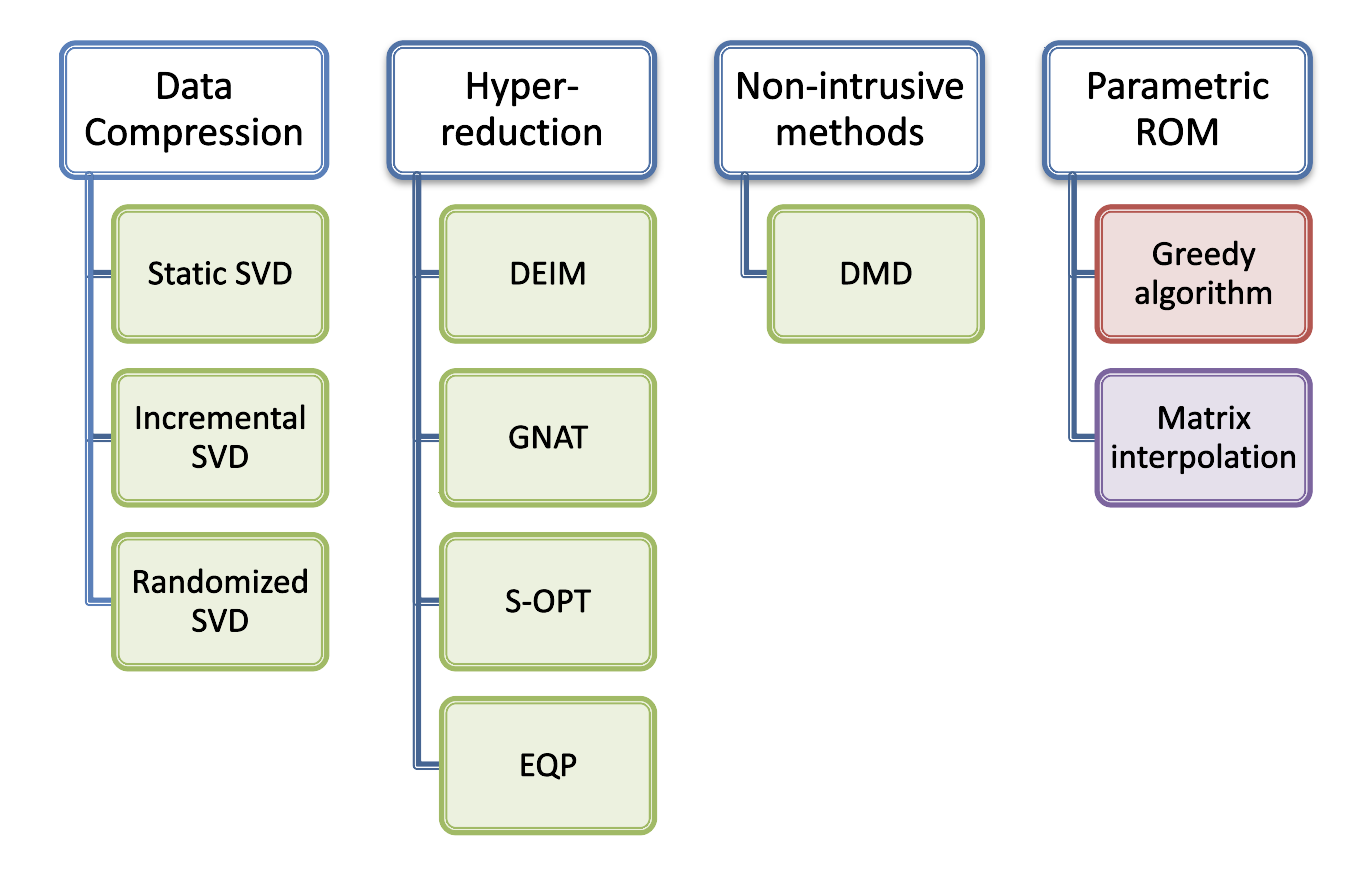

**linalg Module**: The linalg module in pylibROM provides essential linear algebra functionalities for reduced order modeling.

*   **Vector**: Functions and operations for vector manipulation and analysis.
*   **Matrix**: Offers operations and functions related to matrices, including matrix multiplication, inversion, and decomposition.
*   **SVD (Singular Value Decomposition):** Implementation of SVD algorithm for matrix factorization, often used in dimensionality reduction and data compression.
* **BasisGenerator:** The BasisGenerator used to create basis snapshots, which are essential for reduced order modeling. It generates basis snapshots from input data, typically obtained from simulations or experiments.
* **BasisWriter:** The BasisWriter is responsible for writing basis snapshots generated by the BasisGenerator to a file. It takes the generated basis snapshots and stores them in a specified file format for future use.
* **BasisReader:** The BasisReader is used to read basis snapshots from a file that were previously written by the BasisWriter. It retrieves the basis snapshots stored in the file, allowing them to be loaded into memory for further analysis or processing.
*   **NNLS (Non-negative Least Squares):** Provides functionality for solving optimization problems subject to non-negativity constraints.

## **Linalg Module**

### **VECTOR**

In [25]:
import pylibROM.linalg as linalg 
import numpy as np

In [26]:
# Create a Vector object with size 3 and fill it with 1.0
distributed = False
v = linalg.Vector(3,distributed)
v.fill(1.0)
print("Vector - v:", v.getData())

Vector - v: [1. 1. 1.]


In [27]:
# Create a vector with numpy object
arr = np.array([0,1,2])
np_vec = linalg.Vector(arr, False)
print(f"np_vec = { np_vec.getData() }")

np_vec = [0. 1. 2.]


In [28]:
# setSize  and Setitem functions
w = linalg.Vector()
size=3
w.setSize(size)
for i in range(size):
    w.__setitem__(i, i+1)
print("Updated data for w:", w.getData()) 

Updated data for w: [1. 2. 3.]


In [29]:
# Getitem function
print("Get Item (1) of vector(w): ",w.__getitem__(1))

Get Item (1) of vector(w):  2.0


In [30]:
# Use the addition operator to add w to v
v += w
print("Updated data for v after addition:", v.getData())

Updated data for v after addition: [2. 3. 4.]


In [31]:
# Call the normalize function to normalize v
v.normalize()
print("Normalized data for v:", v.getData())

Normalized data for v: [0.37139068 0.55708601 0.74278135]


In [32]:
# inner_product function to calculate the inner product of v and w
inner_prod = v.inner_product(w)
print("Inner product of v and w:", inner_prod)

Inner product of v and w: 3.713906763541037


In [33]:
# mult function to multiply v by a scalar
scaled_v = v.mult(2.0)
print("Scaled v (multiplied by 2.0):", scaled_v.getData())

Scaled v (multiplied by 2.0): [0.74278135 1.11417203 1.48556271]


### **MATRIX**

In [2]:
import pylibROM.linalg as linalg 

In [2]:
# Create a Matrix object with specified dimensions and distribution

num_rows=3
num_cols=4
distributed= False
randomized= False
m1 = linalg.Matrix(num_rows,num_cols, distributed,randomized)

# Fill the matrix with a specified value

m1.fill(2.0)

# Get the data stored in the matrix

print("Data in m1:", m1.get_data())

Data in m1: [[2.0, 2.0, 2.0, 2.0], [2.0, 2.0, 2.0, 2.0], [2.0, 2.0, 2.0, 2.0]]


In [5]:
print("Number of Rows in m1:", m1.numRows())

Number of Rows in m1: 3


In [6]:
print("Number of Columns in m1:", m1.numColumns())

Number of Columns in m1: 4


In [35]:
# Create a matrix with numpy object

mat = np.array([[0,1,2],[0,2,4]])
np_mat = linalg.Matrix(mat, False, False)
print(f"np_mat = { np_mat.getData() }")

np_mat = [[0. 1. 2.]
 [0. 2. 4.]]


In [7]:
# Create a Matrix object with specified dimensions and distribution

m2 = linalg.Matrix(4,4, False,False)

# Change the size of the matrix

m2.setSize(4,3)
m2.fill(4.0)
print("Data in m2:", m2.get_data())

Data in m2: [[4.0, 4.0, 4.0], [4.0, 4.0, 4.0], [4.0, 4.0, 4.0], [4.0, 4.0, 4.0]]


In [9]:
# Set and get values using __setitem__ and __getitem__

matrix = linalg.Matrix(3, 3,False,False)
matrix.fill(3.0)
matrix.__setitem__(0, 0,2.0)
print("Set Item (0,0) of matrix to 2.0:", matrix.get_data())
print("Get Item (0,0):", matrix.__getitem__(0, 0))

Set Item (0,0) of matrix to 2.0: [[2.0, 3.0, 3.0], [3.0, 3.0, 3.0], [3.0, 3.0, 3.0]]
Get Item (0,0): 2.0


In [14]:
# Get a column of the matrix as a Vector 

m = linalg.Matrix(4,2, False,False)
for i in range(m.numRows()):
    for j in range(m.numColumns()):
        m.__setitem__(i,j,i+j)
column = m.getColumn(1)
print("Column 1 of matrix m1:", column.get_data())

Column 1 of matrix m1: [1.0, 2.0, 3.0, 4.0]


In [8]:
# Multiply matrix2 with matrix1

result_matrix1 = m2.mult(m1)
print("Matrix multiplication of m2 and m1:", result_matrix1.get_data())

Matrix multiplication of m2 and m1: [[24.0, 24.0, 24.0, 24.0], [24.0, 24.0, 24.0, 24.0], [24.0, 24.0, 24.0, 24.0], [24.0, 24.0, 24.0, 24.0]]


In [37]:
# Compute and return the outer product of two Vectors

print("Initial data for v:", v.getData())
print("Initial data for w:", w.getData())
result_matrix = linalg.outerProduct(v, w)
print("Outer Product of vectors a and b:", result_matrix.get_data())

Initial data for v: [0.37139068 0.55708601 0.74278135]
Initial data for w: [1. 2. 3.]
Outer Product of vectors a and b: [[0.3713906763541037, 0.7427813527082074, 1.1141720290623112], [0.5570860145311556, 1.1141720290623112, 1.6712580435934667], [0.7427813527082074, 1.4855627054164149, 2.2283440581246223]]


In [9]:
# Compute and return the inverse of the matrix

m = linalg.Matrix(4,4, False,False)
m.fill(4.0)
result_matrix1 = m.inverse()
print("Inverse of matrix m:", result_matrix1.get_data())

Inverse of matrix m: [[4.0, 4.0, 4.0, 4.0], [1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0]]


In [5]:
# Transpose the matrix

m = linalg.Matrix(4,4, False,False)
for i in range(m.numRows()):
    for j in range(m.numColumns()):
        m.__setitem__(i,j,i-j)
print("Matrix m:", m.get_data())
m.transpose()
print("Transposed matrix m:", m.get_data())

Matrix m: [[0.0, -1.0, -2.0, -3.0], [1.0, 0.0, -1.0, -2.0], [2.0, 1.0, 0.0, -1.0], [3.0, 2.0, 1.0, 0.0]]
Transposed matrix m: [[0.0, 1.0, 2.0, 3.0], [-1.0, 0.0, 1.0, 2.0], [-2.0, -1.0, 0.0, 1.0], [-3.0, -2.0, -1.0, 0.0]]


In [8]:
# Apply orthogonalization to the matrix

m = linalg.Matrix(2,3, False,False)
m.fill(2.0)
print("Matrix m:", m.get_data())
m.orthogonalize()
print("Orthogonalized matrix m:", m.get_data())

Matrix m: [[2.0, 2.0, 2.0], [2.0, 2.0, 2.0]]
Orthogonalized matrix m: [[2.0, -0.7071067811865476, 0.7071067811865475], [2.0, -0.7071067811865476, 0.7071067811865475]]


In [12]:
# Compute and return a DiagonalMatrix based on a Vector

result_matrix = linalg.DiagonalMatrixFactory(v)
print("DiagonalMatrix based on vector a:", result_matrix.get_data())

DiagonalMatrix based on vector a: [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]]


In [13]:
# Compute and return an Identity Matrix based on a Vector

result_matrix = linalg.IdentityMatrixFactory(v)
print("IdentityMatrix based on vector a:", result_matrix.get_data())

IdentityMatrix based on vector a: [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]]


### **SVD (Singular Value Decomposition)**

In [13]:
import pylibROM.linalg as linalg 

In [46]:
m = np.array([[0,1,2],[0,2,4]])
m = linalg.Matrix(mat, False, False)
serialsvd1 = linalg.SerialSVD(m)
print("U = ",serialsvd1.U.get_data())
print("S = ",serialsvd1.S.get_data())
print("V = ",serialsvd1.V.get_data())

U =  [[-0.504845897461513, -0.8632094877932468], [-0.8632094877932468, 0.5048458974615131]]
S =  [4.656047666781657, 1.8224215002729445, 0.0]
V =  [[-0.1853953287359517, 0.2770192830724954, 0.0], [-0.21685598326808858, -0.9473214485934935, 0.0]]
